In [25]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report


In [26]:
# loading the MINIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [27]:
# Data preprocessing

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
_

0.0755547508597374

In [28]:
# one hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [29]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train_cat.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test_cat.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28)
Test labels shape: (10000, 10)


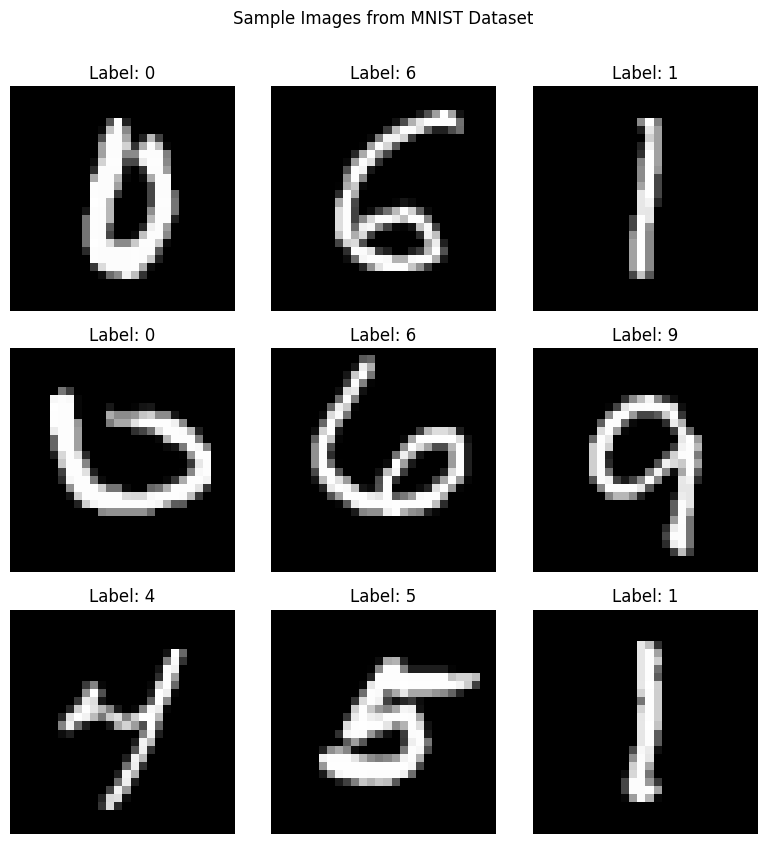

In [30]:
# visualizing random images
plt.figure(figsize=(8, 8))
indices = np.random.choice(range(len(X_train)), 9, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Images from MNIST Dataset", y=1.05)
plt.show()


In [31]:
# Building the Artificial neural network model (ANN)
model = Sequential([
    Flatten(input_shape=(28, 28), name="Input-Flatten"),
    Dense(128, activation='relu', name="Dense-128"),
    Dropout(0.3, name="Dropout-1"),
    Dense(64, activation='relu', name="Dense-64"),
    Dropout(0.3, name="Dropout-2"),
    Dense(10, activation='softmax', name="Output-Softmax")
])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
# training the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/10
422/422 - 5s - 13ms/step - accuracy: 0.8267 - loss: 0.5641 - val_accuracy: 0.9538 - val_loss: 0.1550
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9260 - loss: 0.2515 - val_accuracy: 0.9675 - val_loss: 0.1146
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9422 - loss: 0.1964 - val_accuracy: 0.9708 - val_loss: 0.1003
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9513 - loss: 0.1639 - val_accuracy: 0.9738 - val_loss: 0.0855
Epoch 5/10
422/422 - 3s - 8ms/step - accuracy: 0.9588 - loss: 0.1409 - val_accuracy: 0.9755 - val_loss: 0.0788
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9609 - loss: 0.1266 - val_accuracy: 0.9750 - val_loss: 0.0759
Epoch 7/10
422/422 - 4s - 9ms/step - accuracy: 0.9649 - loss: 0.1158 - val_accuracy: 0.9775 - val_loss: 0.0784
Epoch 8/10
422/422 - 5s - 12ms/step - accuracy: 0.9677 - loss: 0.1072 - val_accuracy: 0.9782 - val_loss: 0.0716
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9692 - loss: 0.1021 - val_accuracy: 0.9775 - val_loss: 0.0739

In [34]:
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,  # ← 10% of training data used for validation
    epochs=10,
    batch_size=128
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9738 - loss: 0.0838 - val_accuracy: 0.9782 - val_loss: 0.0761
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9739 - loss: 0.0852 - val_accuracy: 0.9792 - val_loss: 0.0760
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9763 - loss: 0.0763 - val_accuracy: 0.9798 - val_loss: 0.0713
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9765 - loss: 0.0742 - val_accuracy: 0.9797 - val_loss: 0.0751
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9771 - loss: 0.0715 - val_accuracy: 0.9800 - val_loss: 0.0765
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9768 - loss: 0.0734 - val_accuracy: 0.9797 - val_loss: 0.0715
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9776 - loss: 0.0682 - val_accuracy: 0.9818 - val_loss: 0.0688
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9780 - loss: 0.0671 - val_accuracy: 0

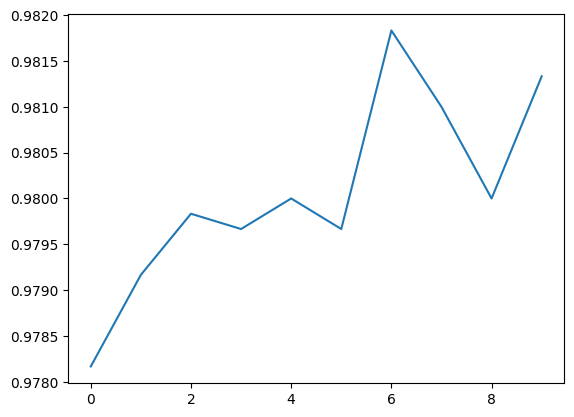

In [35]:
plt.plot(history.history['val_accuracy'], label='Val Acc')


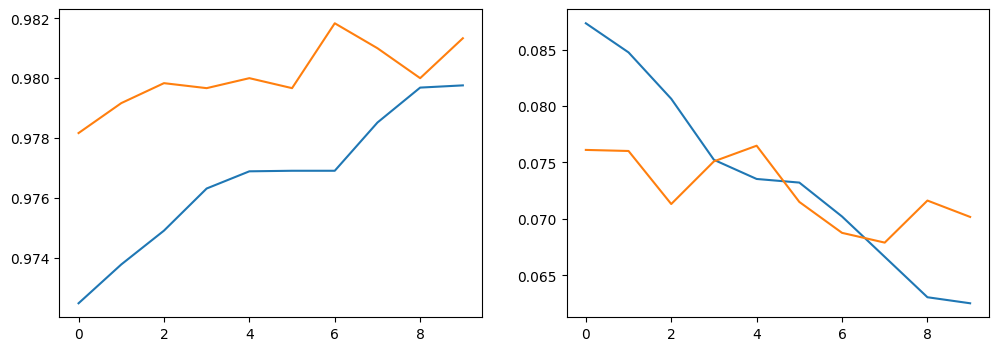

In [36]:
# visualizing accuracy score
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.show()


In [37]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

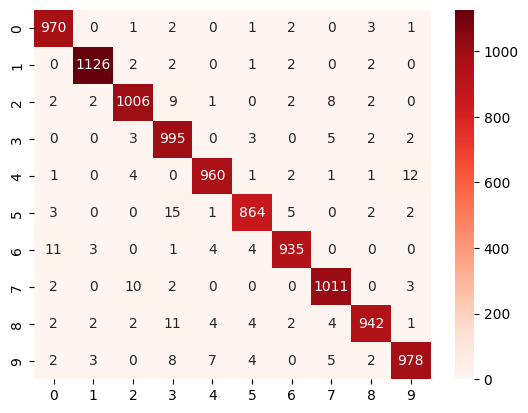

In [38]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')


In [39]:
print(classification_report(y_test, y_pred_classes, digits=4))


              precision    recall  f1-score   support

           0     0.9768    0.9898    0.9833       980
           1     0.9912    0.9921    0.9916      1135
           2     0.9786    0.9748    0.9767      1032
           3     0.9522    0.9851    0.9684      1010
           4     0.9826    0.9776    0.9801       982
           5     0.9796    0.9686    0.9741       892
           6     0.9842    0.9760    0.9801       958
           7     0.9778    0.9835    0.9806      1028
           8     0.9854    0.9671    0.9762       974
           9     0.9790    0.9693    0.9741      1009

    accuracy                         0.9787     10000
   macro avg     0.9787    0.9784    0.9785     10000
weighted avg     0.9788    0.9787    0.9787     10000



In [40]:
model.save("mnist_ann_model.keras", save_format="keras")



In [41]:
reloaded_model = load_model("mnist_ann_model.keras")
_, reloaded_accuracy = reloaded_model.evaluate(X_test, y_test_cat, verbose=0)
